In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def f(x, y):
    return x**2 + np.exp(x) + y**2 - x*y

def g(x, y):
    return x**2 + 2 * y**2

In [118]:
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-2, 2, 100)

In [119]:
# Setup
alpha = 1.07
beta = 9.52
L = 14.67
x1 = (-1, 1)

In [120]:
def gamma1(L, T, x_opt, x1, beta, k):
    return np.linalg.norm([x_opt[0] - x1[0], x_opt[1] - x1[1]]) / (np.sqrt(T) * L + 1e-10)

def gamma2(L, T, x_opt, x1, beta, k):
    return 1 / beta

def gamma3(L, T, x_opt, x1, beta, k):
    return 2 / (alpha * (k + 1))

In [151]:
def project_to_circle(x, y):
    norm = np.sqrt(x**2 + y**2)
    if norm == 0:
        return 0, 0  
    if norm < 1.5:
        return x, y
    scale = np.sqrt(1.5) / norm
    return x * scale, y * scale


def project_to_square(x, y):
    return np.sign(x) * np.minimum(np.abs(x), 1), np.sign(y) * np.minimum(np.abs(y), 1)

def project_to_line(Ax, Ay, Bx, By, x, y):
    t = np.dot(np.array([Bx - Ax, By - Ay]), np.array([x - Ax, y - Ay]).reshape((-1, 1))) / np.linalg.norm([Bx - Ax, By - Ay]) ** 2
    if t <= 0:
        return Ax, Ay
    if t >= 1:
        return Bx, By
    
    return Ax + t * (Bx - Ax), Ay + t * (By - Ay)

def project_to_triangle(x, y):
    A = np.array([-1, -1])
    B = np.array([1.5, -1])
    C = np.array([-1, 1.5])
    P = np.array([x, y])

    if is_inside_triangle(x, y):
        return (x, y)  # No projection needed

    # Project onto all edges and select the closest valid projection
    projections = []
    for edge in [(A, B), (B, C), (C, A)]:
        Ax, Ay = edge[0]
        Bx, By = edge[1]
        proj = project_to_line(Ax, Ay, Bx, By, x, y)
        projections.append(proj)

    # Find the closest projection
    min_dist = float('inf')
    closest_proj = (x, y)
    for proj in projections:
        dist = np.linalg.norm(np.array(proj) - P)
        if dist < min_dist:
            min_dist = dist
            closest_proj = proj

    return closest_proj

def is_inside_triangle(x, y):
    v0 = np.array([1.5 - (-1), -1 - (-1)])  # Vector AC
    v1 = np.array([-1 - (-1), 1.5 - (-1)])  # Vector AB
    v2 = np.array([x - (-1), y - (-1)])     # Vector AP

    dot00 = np.dot(v0, v0)
    dot01 = np.dot(v0, v1)
    dot02 = np.dot(v0, v2)
    dot11 = np.dot(v1, v1)
    dot12 = np.dot(v1, v2)

    inv_denom = 1 / (dot00 * dot11 - dot01 * dot01)
    u = (dot11 * dot02 - dot01 * dot12) * inv_denom
    v = (dot00 * dot12 - dot01 * dot02) * inv_denom

    return (u >= 0) and (v >= 0) and (u + v <= 1)

def project(x, y, domain):
    if domain == "circle":
        return project_to_circle(x, y)
    if domain == "square":
        return project_to_square(x, y)
    if domain == "triangle":
        return project_to_triangle(x, y)

In [122]:
def grad_f(x, y):
    return 2*x + np.exp(x) - y, 2*y - x


In [123]:
project_to_circle(2, 0)
project_to_square(3, 0)
project_to_line(1.5, -1, -1, 1.5, 1, 0)

project_to_triangle(-2, 1)

(np.float64(-1.0), np.float64(1.5))

In [268]:
def minimum(f):
    """Finds approximate minimum of f(x)"""
    xs = np.linspace(-1, 1, 10000)
    ys = np.linspace(-1, 1, 10000)
    X, Y = np.meshgrid(xs, ys)  
    Z = f(X, Y)  
    
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)  
    bx, by, bz = X[min_idx], Y[min_idx], Z[min_idx]
    return bx, by, bz
    print(bx, by, bz)

In [269]:
minimum(f)

(np.float64(-0.4325432543254325),
 np.float64(-0.21632163216321632),
 np.float64(0.7891770393121771))

In [126]:
1 / beta

0.10504201680672269

In [288]:
pts_x = []
pts_y = []

def pgd(x0, y0, domain, gamma_fn, fn, grad_fn):
    pxs = [x0]
    pys = [y0]
    x, y = x0, y0
    
    x_opt = np.array([-0.43343343, -0.217217])
    
    for i in range(10):
        lr = gamma_fn(L, i, x_opt, np.array([x, y]), beta, i)
        # print(lr)
        dx, dy = grad_fn(x, y)
        x = x - lr * dx
        y = y - lr * dy
        
        x, y = project(x, y, domain)

        pts_x.append(x)
        pts_y.append(y)
    print(domain, x,y, fn(x,y))
    pxs.extend(pts_x)
    pys.extend(pts_y)
    pts_x.clear()
    pts_y.clear()
    return x, y, pxs, pys      

In [289]:
x, y, pxs, pys = pgd(-1, 1, "square", gamma2, f, grad_f)
x, y, f(x,y)

square -0.355701139323922 -0.08418420993529793 0.8043478575732265


(np.float64(-0.355701139323922),
 np.float64(-0.08418420993529793),
 np.float64(0.8043478575732265))

In [291]:
pts_x = pxs
pts_y = pys
len(pxs), len(pts_x)

(11, 11)

In [293]:
f(-0.355, -0.084)

np.float64(0.8044344432085724)

In [203]:
x1, y1 = -1, 1
x_opt, y_opt, xy_opt = minimum(f)
k = 10
T = 10

def get_constraint_1():
    T = 10
    _x1, _y1 = project_to_square(x1, y1)
    return L * np.linalg.norm([[_x1 - x_opt], [_y1 - y_opt]]) / np.sqrt(T)

def get_constraint_2():
    _x1, _y1 = project_to_circle(x1, y1)
    return (3 * beta * np.linalg.norm([[_x1 - x_opt], [_y1 - y_opt]])**2 + f(_x1, _y1) - xy_opt) / k

def get_constraint_3():
    return (2 * L**2) / (alpha * (T + 1))

Gamma 1 constraint

In [281]:
xopt, yopt, _ = minimum(f)

f(np.mean(pts_x), np.mean(pts_y)) - f(xopt, yopt), get_constraint_1()

(np.float64(0.4921913978055845), np.float64(6.425764986208601))

Gamma 2 constraint

In [292]:
f(pts_x[-1], pts_y[-1]) - xy_opt, get_constraint_2()

(np.float64(0.015169756242871979), np.float64(5.737454916918436))

Gamma 3 constraint

In [263]:
param = np.sum([2 * i / (T * (T + 1)) * xi for i, xi in zip(range(1, T+1), pts_x)]), np.sum([2 * i / (T * (T + 1)) * yi for i, yi in zip(range(1, T+1), pts_y)])
print(param)
f(param[0], param[1]) - xy_opt, get_constraint_3()

(np.float64(-0.3821640523805325), np.float64(-0.17205201689370458))


(np.float64(0.003104159573170673), 36.56905692438402)

In [271]:
opts = []
_pxs = []
_pys = []
x0, y0 = -1, 1
for d in ["circle", "square", "triangle"]:  
    print()
    for gamma in [gamma1, gamma2, gamma3]:
        x_opt, y_opt, pxs, pys = pgd(x0, y0, d, gamma, f, grad_f)
        _pxs.append(pxs)
        _pys.append(pys)
        opts.append((x_opt, y_opt, f(x_opt, y_opt)))


circle -0.012621423594652872 -0.44461188544108715 1.1796852865949863
circle -0.355701139323922 -0.08418420993529793 0.8043478575732265
circle -0.43867589731458617 -0.22464368249546518 0.7892453142399585

square -0.005540718663055069 -0.4417810044601094 1.1872279740169063
square -0.355701139323922 -0.08418420993529793 0.8043478575732265
square -0.432720522409009 -0.2164590692849873 0.7891770729084704

triangle 0.0005839144071258153 -0.34702810491912933 1.1212155661882663
triangle -0.355701139323922 -0.08418420993529793 0.8043478575732265
triangle -0.483326239099319 -0.285173275349636 0.7938249132797365


In [134]:
def euclidean(x, y, x_opt, y_opt):
    return np.linalg.norm([[x - x_opt], [y - y_opt]])

In [135]:
xo, yo, _ = minimum(f)
for x, y in zip(pts_x, pts_y):
    print(euclidean(x, y,xo, yo))

In [136]:
get_constraint_1()

np.float64(6.425764986208601)

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [138]:
x = np.linspace(-2, 2, 100)  # 100 points from -5 to 5
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)      # Create a 2D grid
Z = f(X, Y)                   # Compute Z = f(X, Y) for each (x, y)

In [139]:
x_opt, y_opt, f(x_opt, y_opt)

(np.float64(-0.483326239099319),
 np.float64(-0.285173275349636),
 np.float64(0.7938249132797365))

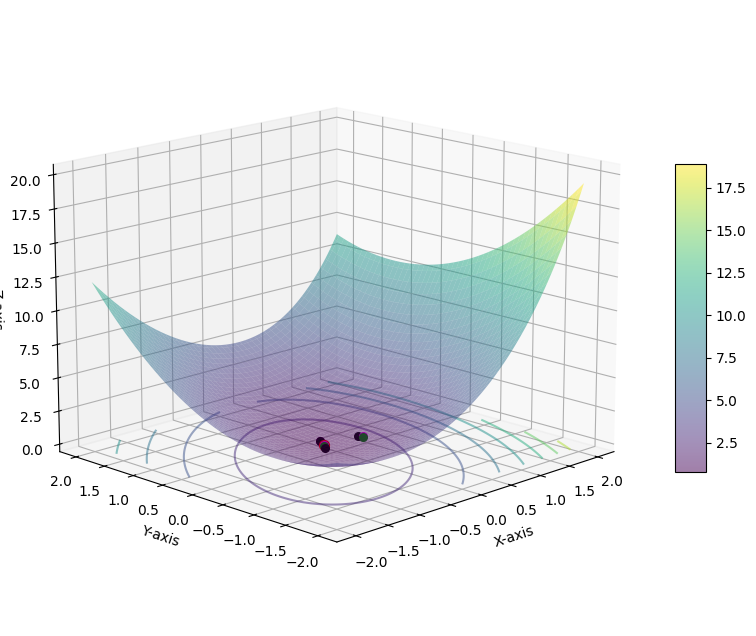

In [272]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Rotate the view: elev for top-down tilt, azim for side rotation
ax.view_init(elev=15, azim=225)  # X-axis on right, Y-axis on left

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Add contour/level lines at the base
ax.contour(X, Y, Z, zdir='z', offset=np.min(Z)-1, cmap='viridis', linestyles="solid", alpha=.5)

# Plot optimization points
# ax.scatter(-1, 1, f(-1, 1), c="red", s=100)
colors = ["green", "green", "green", "#ff00ff", "#ff00ff", "#ff00ff", "black", "black", "black"]
for i, (x_opt, y_opt, z_opt) in enumerate(opts):
    ax.scatter(x_opt, y_opt, z_opt, s=30, c=colors[i])
    # ax.plot(_pxs[i], _pys[i], f(np.array(_pxs[i]), np.array(_pys[i])), c=colors[i], alpha=.8)
    
    # try:
    #     # ax.text3D(x_opt, y_opt, z_opt, f"{x_opt:.2f}, {y_opt:.2f}, {z_opt:.2f}", c=colors[i])
    # except:
    #     pass

# Mark global minimum
xo, yo, zo = minimum(f)
ax.scatter(xo, yo, zo, c="red", s=50)

# Axes labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
# ax.set_title(f"{xo:.3f}, {yo:.3f}, {zo:.3f}")

# Colorbar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


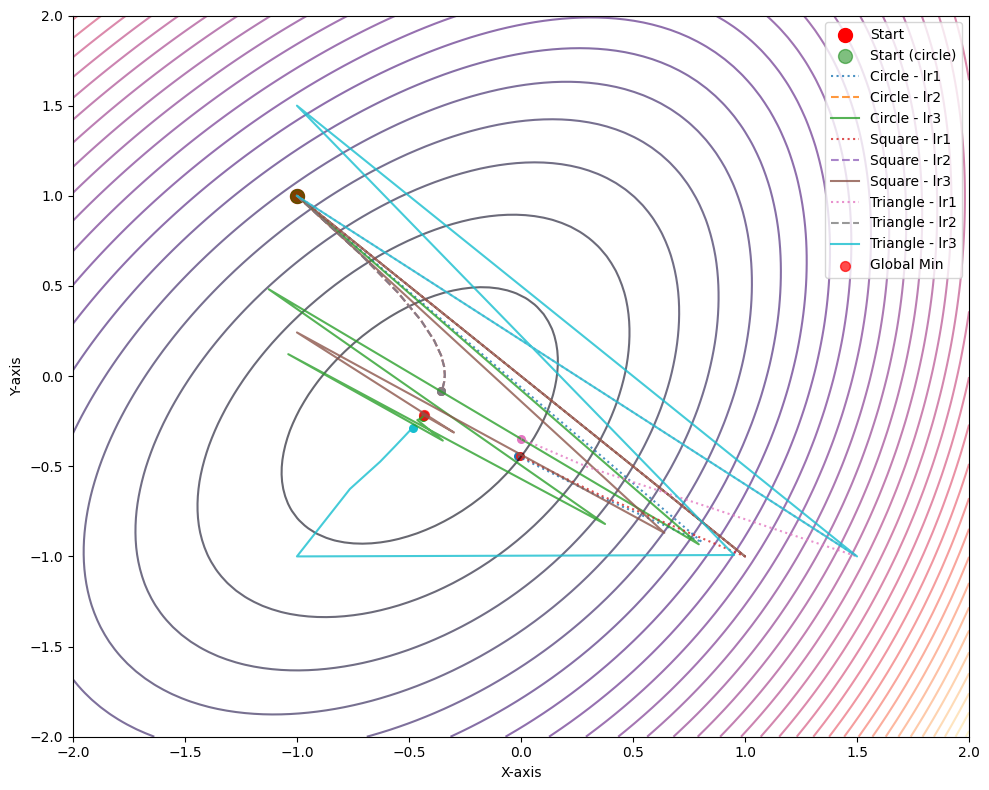

In [296]:
fig, ax = plt.subplots(figsize=(10, 8))

# Contour lines
contour = ax.contour(X, Y, Z, levels=30, cmap='magma', linestyles="solid", alpha=0.6)

# Mark initial point
ax.scatter(-1, 1, c="red", s=100, label="Start")
cx0, cy0 = project_to_circle(-1, 1)
ax.scatter(cx0, cy0, c="green", s=100, label="Start (circle)", alpha=.5)

linestyles = ["solid", "dashed", "dotted"][::-1]
domains = ["Circle", "Square", "Triangle"]
lr = ["lr1", "lr2", "lr3"]
colors = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#17becf",
]
# Plot trajectories
for i in range(len(opts)):
    x_opt, y_opt, _ = opts[i]
    ax.scatter(x_opt, y_opt, c=colors[i], s=30)
    ax.plot(_pxs[i], _pys[i], color=colors[i], alpha=0.8, label=f"{domains[i//3]} - {lr[i % 3]}", linestyle=linestyles[i % 3])

# Mark global minimum
xo, yo, _ = minimum(f)
ax.scatter(xo, yo, c="red", s=50, label="Global Min", alpha=.7)

# Axes labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.legend()

plt.tight_layout()
plt.show()


# Task 2

In [306]:
a = [[3.0, 10, 30],
     [0.1, 10, 35],
     [3, 10, 30],
     [0.1, 10, 35]]

c = [1.0, 1.2, 3.0, 3.2]

p = [[0.3689, 0.1170, 0.2673],
     [0.4699, 0.4387, 0.7479],
     [0.1091, 0.8732, 0.5547],
     [0.03815, 0.5743, 0.8828]]

In [307]:
def g(z):
    res = 0
    for i in range(len(c)):
        res += c[i] * np.exp(
            -np.sum([a[i][j] * (z[j] - p[i][j])**2 for j in range(3)])
        )
    return -res
    
g([.1, .2, .3])

np.float64(-0.7328944029304731)

In [308]:
def dgdz(z: list, k: int):
    res = 0
    for i in range(len(c)):
        res += 2 * c[i] * -1 * a[i][k] * (z[k] - p[i][k]) * np.exp(-np.sum([a[i][j] * (z[j] - p[i][j])** 2 for j in range(3)]))
    return -res

In [309]:
def project_to_cube(x, y, z):
    return np.clip(x, 0, 1), np.clip(y, 0, 1), np.clip(z, 0, 1)

In [323]:
def pgd_z(x0, y0, z0, fn):
    x, y, z = x0, y0, z0
    lr = .01
    
    for i in range(1000):
        lr *= 0.99

        dx, dy, dz = dgdz((x, y, z), 0), dgdz((x, y, z), 1), dgdz((x, y, z), 2)
        _x = x - lr * dx
        _y = y - lr * dy
        _z = z - lr * dz
        
        distance = np.linalg.norm([x - _x, y - _y, z - _z])
        if distance < 0.00000001:
            print("Convergence @ iteration", i)
            break
        
        
        x, y, z = project_to_cube(_x, _y, _z)

    return x, y, z     

In [324]:
fmin = 0
min_dist = np.inf
x_opt, y_opt, z_opt = 0, 0, 0
for i in range(10):
    x0, y0, z0 = np.random.rand(3)

    x, y, z = pgd_z(x0, y0, z0, g)
    
    if i == 0:
        min_dist = np.abs(g([x,y,z])**2 - 3.86278214782076**2)
        fmin = g([x,y,z])
        x_opt, y_opt, z_opt = x, y, z
        
    else:
        if np.abs(g([x,y,z])**2 - 3.86278214782076**2) < min_dist:
            print(min_dist)
            fmin = g([x,y,z])
            min_dist = np.abs(g([x,y,z])**2 - 3.86278214782076**2)
            x_opt, y_opt, z_opt = x, y, z
    print(x,y,z, g([x,y,z]), min_dist)

Convergence @ iteration 923
0.1060558500028555 0.5555164332510387 0.852614945391045 -3.8673847756523774 0.03557908142502697
Convergence @ iteration 987
0.37211687536599625 0.11755634315317066 0.2675704180303685 -1.000778206467922 0.03557908142502697
0.31427698170537327 0.5543160659618223 0.8528794979615772 -3.8440116185515194 0.03557908142502697
Convergence @ iteration 818
0.3680973987319855 0.11756101677385222 0.267571799450594 -1.000811607077658 0.03557908142502697
0.03557908142502697
0.20685727453696648 0.5551172642989156 0.8525525536706715 -3.8623442553835696 0.0033827744283012606
Convergence @ iteration 131
0.10933447913698116 0.8606411203849895 0.5640801511442206 -3.0890526382084893 0.0033827744283012606
Convergence @ iteration 207
0.10933471717839358 0.8606411201013588 0.5640801512386658 -3.0890526382071326 0.0033827744283012606
0.2322552024225919 0.5549591551282801 0.8525969243021435 -3.85917636695779 0.0033827744283012606
0.47010662483973215 0.552739346439525 0.853793975439526

In [321]:
fmin, x_opt, y_opt, z_opt, min_dist

(np.float64(-3.8596004688848558),
 np.float64(0.22105271415004238),
 np.float64(0.5495202488797712),
 np.float64(0.8522588805992424),
 np.float64(0.02457014210656361))